## 計算梯度

In [11]:
def func(x):
    return x ** 2 

def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / (h)


In [12]:
func(3)

9

In [13]:
dfunc(func, 3)

6.000100000012054

In [15]:
# 切線函數
def tfunc(f, x, t):
    d = dfunc(f, x)
    y = f(x) - d*x
    return d*t + y


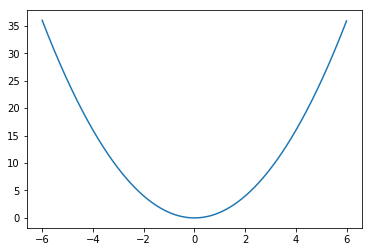

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# 繪製 x ^ 2 
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)


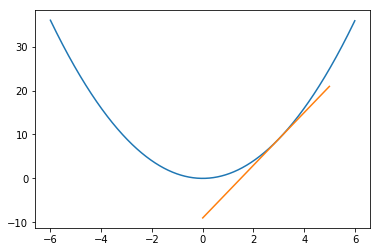

In [18]:
# 繪製 x ^ 2 
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

# 繪製x = 3 時的切線
x2 = np.arange(0, 5, 0.01)
y2 = tfunc(func, 3, x2)
plt.plot(x2, y2)

In [19]:
def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x-h)) / (2*h)


In [20]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):    
    x = init_x       
    res = [x]
    for i in range(epochs):         
        grad = dfunc(func,x)        
        x = x - grad * lr
        res.append(x)
    return np.array(res)


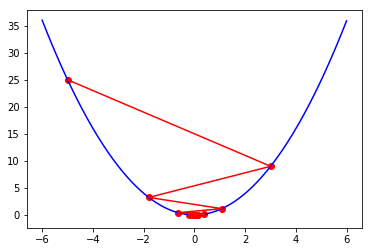

In [22]:
x = gradient_descent(func, -5, lr=0.8)

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


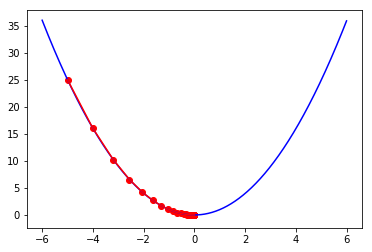

In [24]:
x = gradient_descent(func, -5, lr=0.1)

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


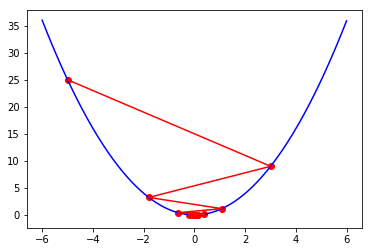

In [25]:
x = gradient_descent(func, -5, lr=0.8)

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


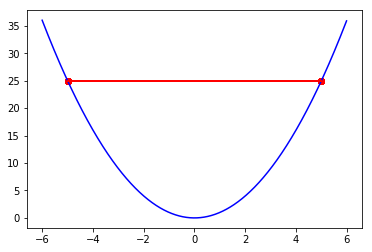

In [26]:
x = gradient_descent(func, -5, lr=1)

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


## 計算神經網路的梯度

In [7]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))


In [30]:
# 初始網路
x  = np.array([0.6, 0.9])
np.random.seed(42)
weight   = np.random.randn(2,3)
z        = np.dot(x, weight)
# 取得預測值 y_hat
y_hat    = softmax_function(z)

# 計算代價(損失)
y        = np.array([0, 0, 1])
cross_entropy_err(y_hat, y)


1.8025260716416405

In [31]:
def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad


In [32]:
def predict(x):
    return np.dot(x, weight)

def loss(x, y):
    z = predict(x)
    y_hat = softmax_function(z)
    loss = cross_entropy_err(y_hat, y)
    return loss

func = lambda w: loss(x, y)
dfunc(func, weight)


array([[ 0.43933796,  0.0617329 , -0.50107086],
       [ 0.65900694,  0.09259935, -0.75160629]])

In [33]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [34]:
net = ANN(input_size=4, hidden_size=5, output_size=3)


In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
x= iris.data


In [36]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
y = np.zeros((len(iris.target), 3))
y[0:3,]


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [39]:
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [40]:
y[0:3,]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [55]:
epochs = 3000
lr     = 0.01

train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)

In [43]:
train_loss[-30:-1]

[760.5381366815425,
 760.6867013479335,
 760.5363002899057,
 760.6847167769483,
 760.534463056217,
 760.6827312154254,
 760.532624977998,
 760.6807446603847,
 760.530786052618,
 760.6787571093881,
 760.5289462776414,
 760.6767685591974,
 760.527105650397,
 760.6747790073573,
 760.5252641684525,
 760.6727884511912,
 760.5234218289927,
 760.670796887834,
 760.5215786298094,
 760.6688043146635,
 760.5197345680642,
 760.6668107287967,
 760.5178896415541,
 760.6648161279754,
 760.5160438476676,
 760.662820509113,
 760.5141971839146,
 760.6608238697987,
 760.512349647753]

Text(0.5,1,'Training Loss')

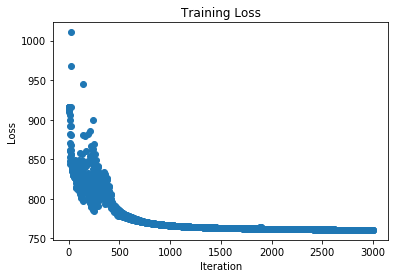

In [44]:


plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')


In [48]:
predicted = np.argmax(net.predict(x), axis = 1)

In [52]:
sum(predicted == iris.target) / len(iris.target)

0.98

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(iris.target, predicted)

0.98

In [54]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]])

## 反向傳播

In [56]:
class Relu:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        self.cache = (x <=0)
        out = np.maximum(0,x)
        return out

    def backward(self, dout):
        dout[self.cache] = 0
        dx = dout
        return dx



In [57]:
a = Relu()

In [58]:
a.forward(np.array([-3, 1]))

array([0, 1])

In [59]:
a.cache

array([ True, False])

In [61]:
a.backward(np.array([2,5]) )

array([0, 5])

## 微分
- https://www.wolframalpha.com/input/?i=differentiate+1%2Fy

In [1]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1/ (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        y  = self.out
        dx = dout * y * (1-y)
        return dx


In [2]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout)
        return dx



In [3]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y_hat = None 
        self.y = None 

    def forward(self, x, y):
        self.y = y
        self.y_hat = softmax_function(x)
        self.loss = cross_entropy_err(self.y_hat, self.y)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        dx = (self.y_hat - self.y) / batch_size
        return dx


In [4]:
import numpy as np
from collections import OrderedDict

class ANN:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return self.lastLayer.forward(y_hat, y)
  
    def gradient(self, x, y):
        # forward
        self.loss(x, y)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [18]:
def softmax_function(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))


In [19]:
def cross_entropy_err(y_hat, y):
    y      = y.reshape(1, y.size)
    y_hat  = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()

y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [21]:
import random
epochs     = 10000
lr         = 0.01
batch_size = 10
net = ANN(input_size=4, hidden_size=5, output_size=3)

train_loss = []
for i in range(epochs): 
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)

Text(0.5,1,'Training Loss')

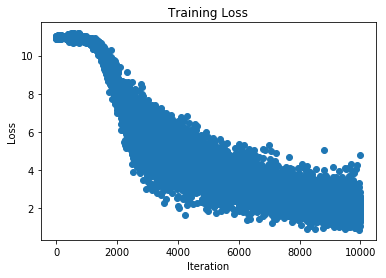

In [22]:
from matplotlib import pyplot as plt

plt.scatter(range(0,10000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')


In [24]:
predicted = np.argmax(net.predict(iris.data), axis = 1)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(iris.target, predicted)

0.98

In [26]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]])

## SVM

In [28]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
iris = load_iris()

X = iris.data[0:100,[2,3]]
y = iris.target[0:100]

clf1 = SVC(kernel="linear")
clf1.fit(X, y)

clf2 = LogisticRegression()
clf2.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

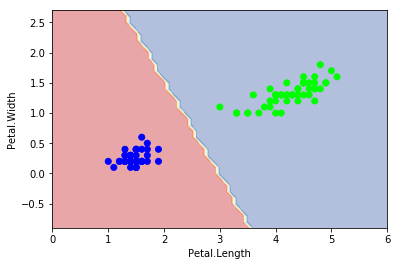

In [30]:
plot_estimator(clf1, X, y)

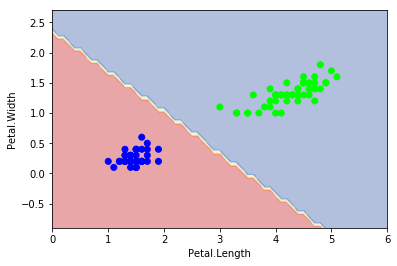

In [31]:
plot_estimator(clf2, X, y)

In [32]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-0.4,0.5,1],[2,5,1]])
X = data[:, :2] 
Y = data[:,2]


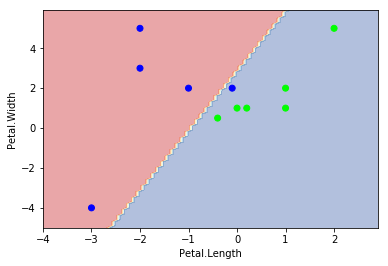

In [33]:
# Large Margin
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)



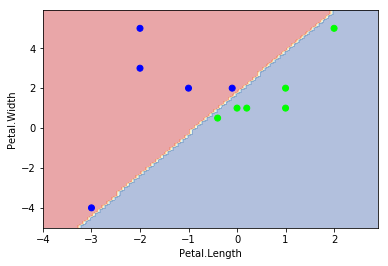

In [35]:
# Narrow Margin
clf = SVC(C=100000, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

In [36]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target


In [37]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

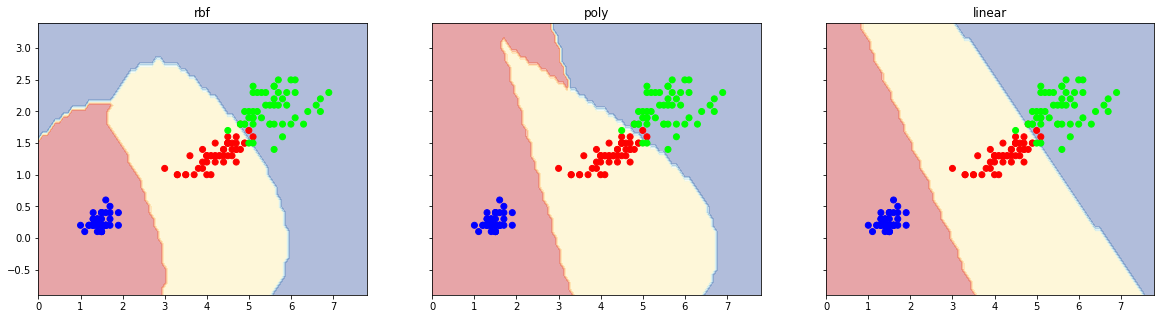

In [38]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    axarr[idx].set_title(title)
